In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
classification = "KNN"

In [50]:
df = pd.read_csv(rf'D:\Github\Data_Mining_113-2\Data_Mining_Final\classification\result\{classification}_unknown.csv')
ans_df = pd.read_csv(r'D:\Github\Data_Mining_113-2\Data_Mining_Final\dataset\test_label.csv')
X_ids = df.iloc[:, 0]
X = df.iloc[:, 1:]
X = X.to_numpy()
X

array([[ 0.41294407,  2.69630547,  3.28818135, ...,  9.14306428,
         4.26506177,  0.        ],
       [ 0.        ,  3.09000653,  3.52619404, ...,  9.81024064,
         5.86081882,  1.58688481],
       [ 0.        ,  1.78663818,  1.7684596 , ...,  9.91253461,
         8.25696817,  0.        ],
       ...,
       [ 0.        ,  3.24958187,  3.70749166, ...,  9.46671072,
         4.6774575 ,  0.5866927 ],
       [ 0.        ,  2.59033853,  2.78797567, ..., 10.40058062,
         5.71875068,  0.        ],
       [ 0.        ,  2.32524248,  3.80593214, ...,  9.84479363,
         4.55071601,  0.        ]], shape=(222, 20531))

In [51]:
n= X.shape[0]
dis = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        dis[i, j] = np.linalg.norm(X[i] - X[j])
dis

array([[  0.        , 256.41807807, 310.31956081, ..., 307.00598858,
        286.27065266, 269.6363848 ],
       [256.41807807,   0.        , 325.72299073, ..., 309.66391063,
        301.04573095, 268.04552622],
       [310.31956081, 325.72299073,   0.        , ..., 323.04272172,
        289.45838304, 291.61133294],
       ...,
       [307.00598858, 309.66391063, 323.04272172, ...,   0.        ,
        278.13177452, 268.46775511],
       [286.27065266, 301.04573095, 289.45838304, ..., 278.13177452,
          0.        , 186.17261683],
       [269.6363848 , 268.04552622, 291.61133294, ..., 268.46775511,
        186.17261683,   0.        ]], shape=(222, 222))

In [52]:
k = 5 # Number of nearest neighbors
S = np.zeros((n,n))
for i in range(n):
    neighbors = np.argsort(dis[i])[1:k+1]  # Skip index 0 (self)
    for j in neighbors:
        S[i][j] = np.exp(-dis[i][j]**2 / (2 * np.median(dis[i])**2))
S

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69860445, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(222, 222))

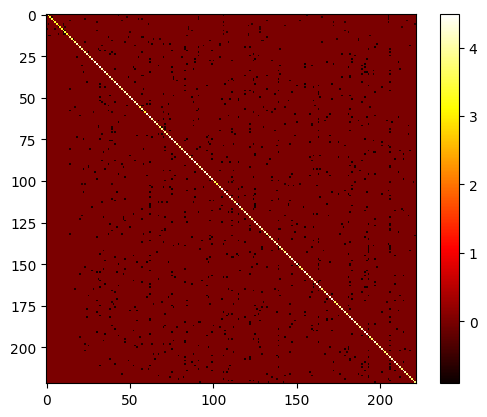

In [53]:
D = np.diag(np.sum(S, axis=1))
L = D - S
plt.imshow(L, cmap='hot', interpolation='nearest')
plt.colorbar()

In [59]:
eigenvalues, eigenvectors = np.linalg.eig(L)
U= eigenvectors[:, np.argsort(eigenvalues)[:k]]  # Get the first k eigenvectors
norm = np.linalg.norm(U, axis=1, keepdims=True)
norm[norm == 0] = 1  # Avoid division by zero
U = U / norm

In [64]:
max_iters=100
tol=1e-4
n_samples, n_features = U.shape
K=2 # Number of clusters(for k means)
random_idxs = np.random.choice(n_samples, K, replace=False)
centroids = U[random_idxs]

for iteration in range(max_iters):
    distances = np.linalg.norm(U[:, np.newaxis] - centroids, axis=2)  # shape: (n_samples, k)
    labels = np.argmin(distances, axis=1)  # shape: (n_samples,)
    new_centroids = np.array([U[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(K)])
    if np.linalg.norm(new_centroids - centroids) < tol:break
    centroids = new_centroids

c:\Users\Benny\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\Benny\AppData\Local\Temp\ipykernel_242844\732549484.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


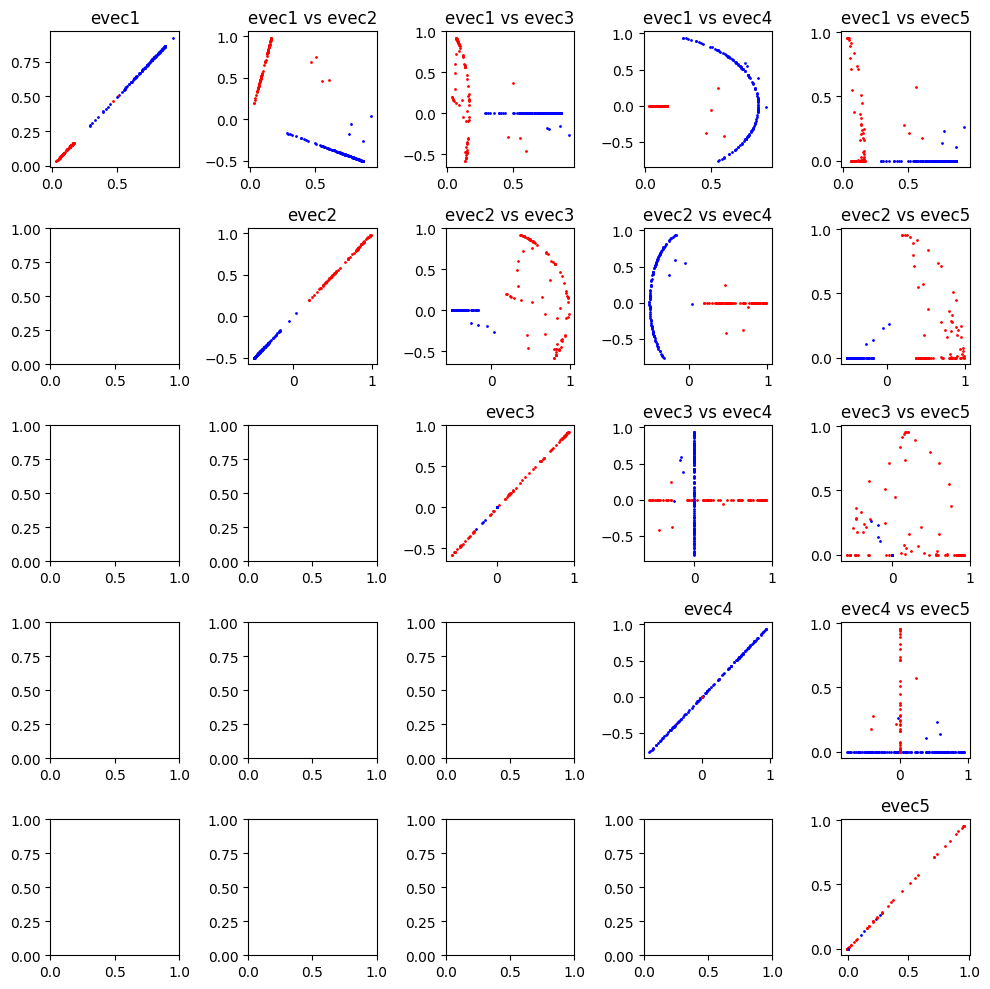

In [67]:
fig, axs = plt.subplots(k, k, figsize=(10, 10), constrained_layout=True)
for p in range(k):
    for q in range(k):
        if p == q:
            axs[p, q].set_title(f'evec{p+1}')
        if p < q:
            axs[p, q].set_title(f'evec{p+1} vs evec{q+1}')
for i in range(222):
    for p in range(k):
        for q in range(k):
            if p <= q:
                if labels[i] == 0:
                    axs[p, q].scatter(U[i, p], U[i, q], c='red', s=1)
                else:
                    axs[p, q].scatter(U[i, p], U[i, q], c='blue', s=1)
plt.tight_layout()
plt.show()

In [68]:
labels_str = ["unknown "+str(label) for label in labels]
labels_str = pd.DataFrame(labels_str, columns=['label'])
labels_str['id'] = X_ids
labels_str = labels_str[['id', 'label']]
labels_str.to_csv(rf'D:\Github\Data_Mining_113-2\Data_Mining_Final\clustering\result\{classification}_Spectral_Clustered.csv', index=False)